In [1]:

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import sweetviz as sv

/Users/shivasaivummaji/miniconda3/envs/stock-analysis/lib/python3.11/site-packages/sweetviz/graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


Understanding Data

In [2]:
sp500_historic_df = pd.read_csv("../data/sp500_historical.csv")
display(sp500_historic_df.head())

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2015-10-28,A,34.609634,37.520000,37.610001,36.770000,37.060001,1780100.0
1,2015-10-28,AAPL,26.803020,29.817499,29.825001,29.014999,29.232500,342205600.0
2,2015-10-28,ABBV,35.140800,53.259998,53.840000,52.080002,52.820000,7869000.0
3,2015-10-28,ABT,37.075253,44.759998,44.770000,43.639999,43.959999,6158300.0
4,2015-10-28,ACGL,24.612423,25.883333,25.969999,25.666668,25.920000,1280100.0


In [3]:
print(sp500_historic_df.columns)

Index(['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')


                                             |          | [  0%]   00:00 -> (? left)


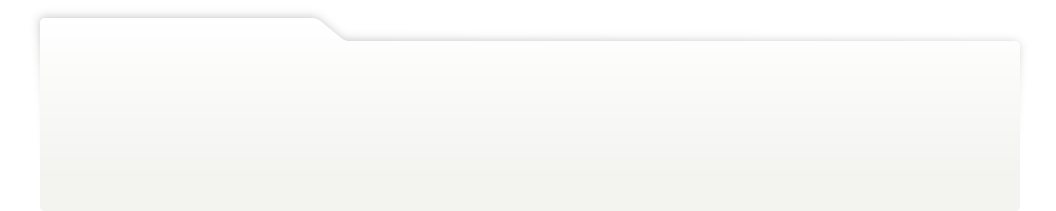
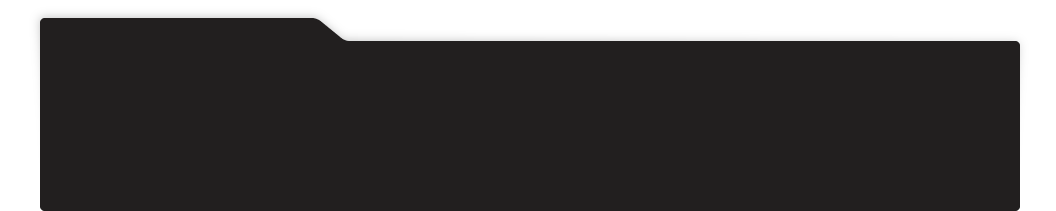
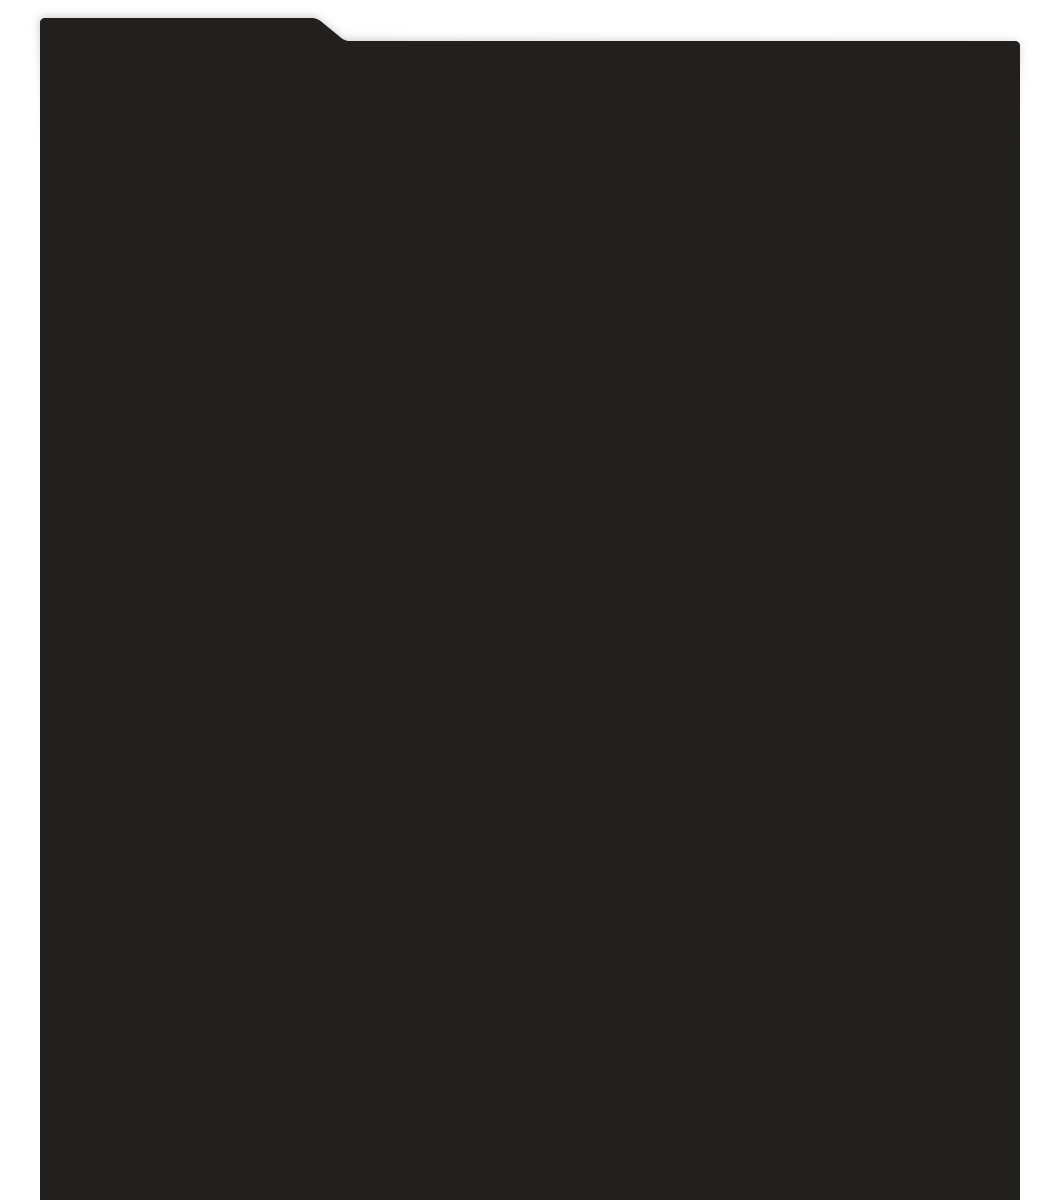
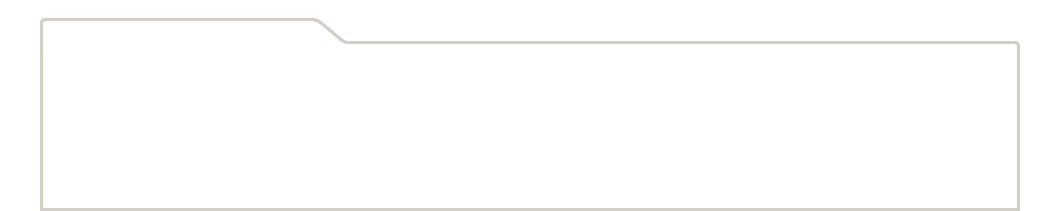
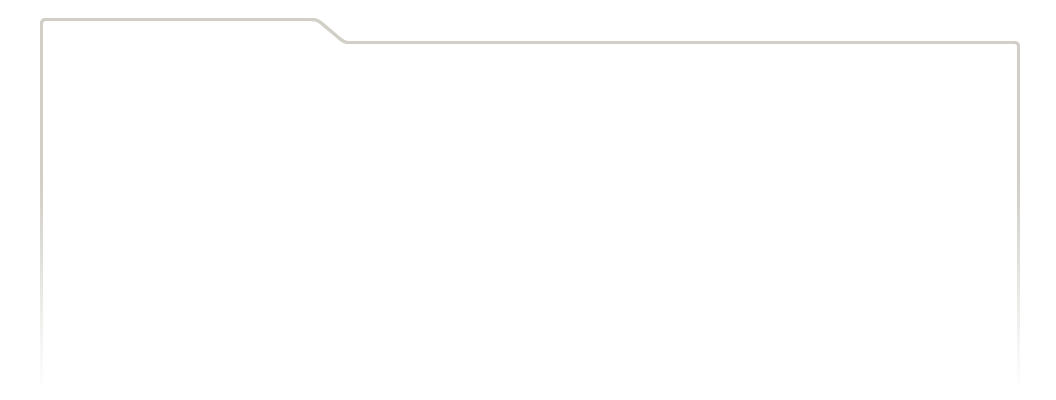
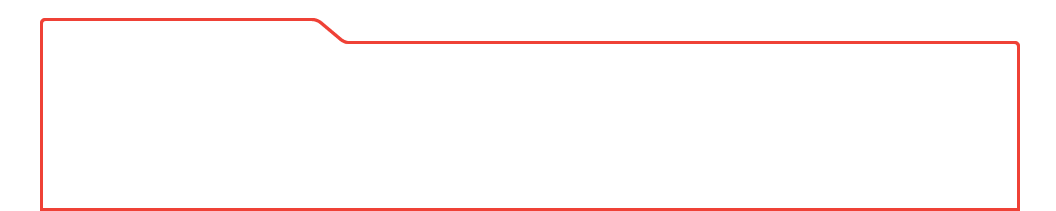
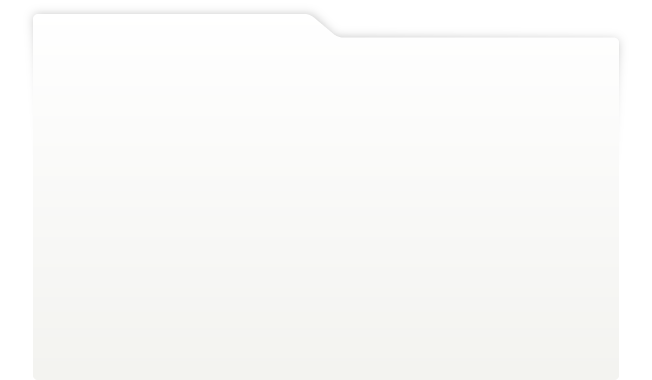
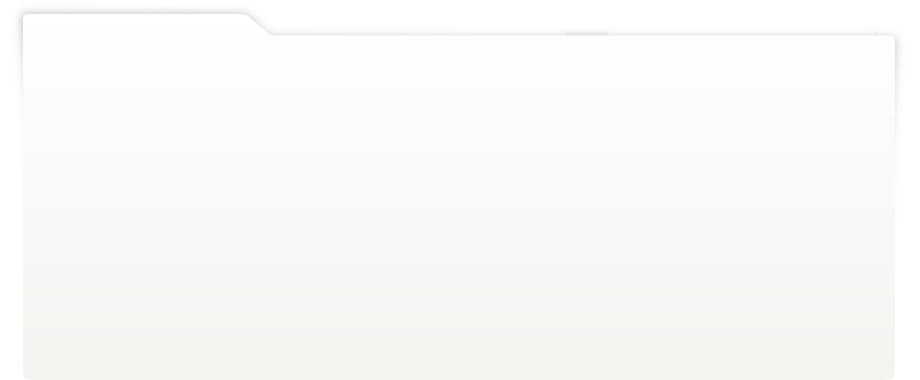
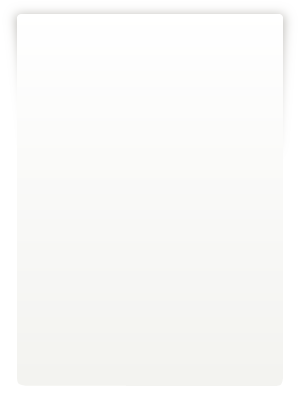
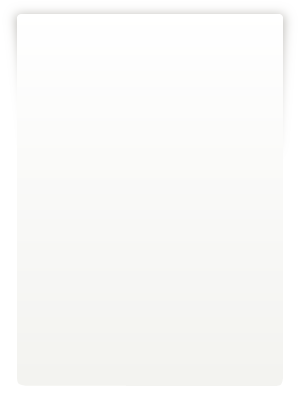
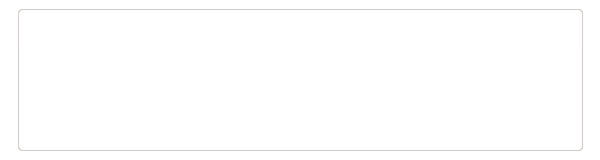
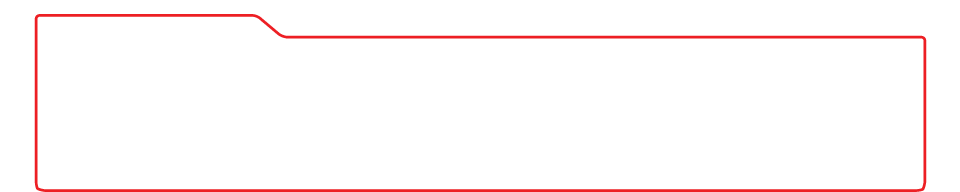
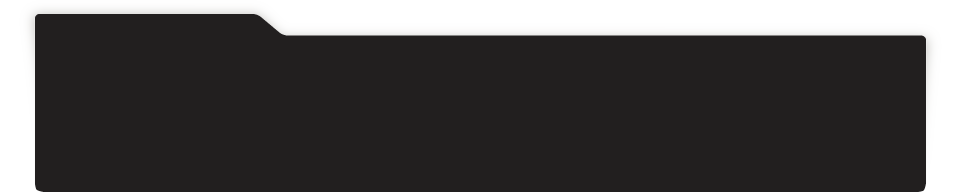
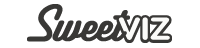
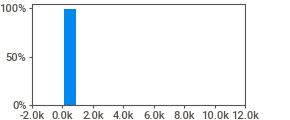
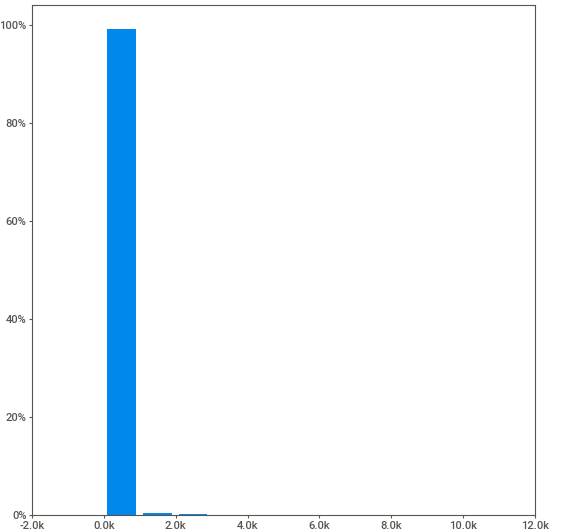
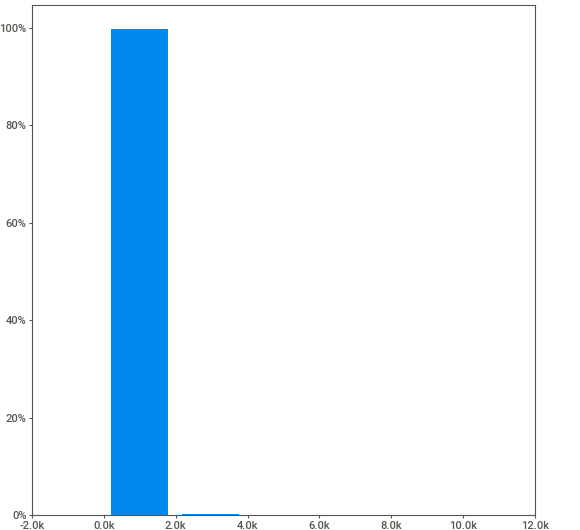
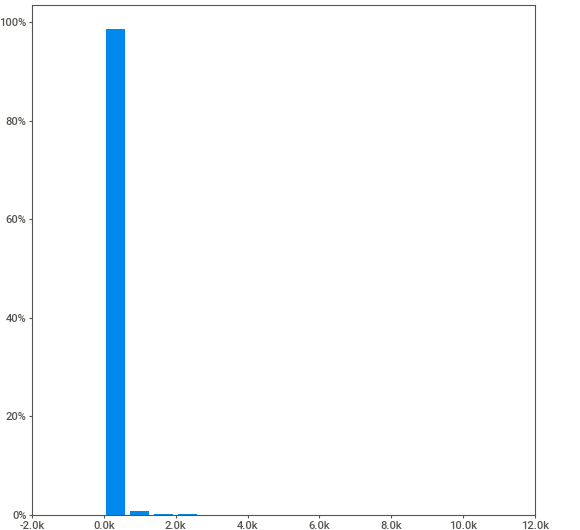
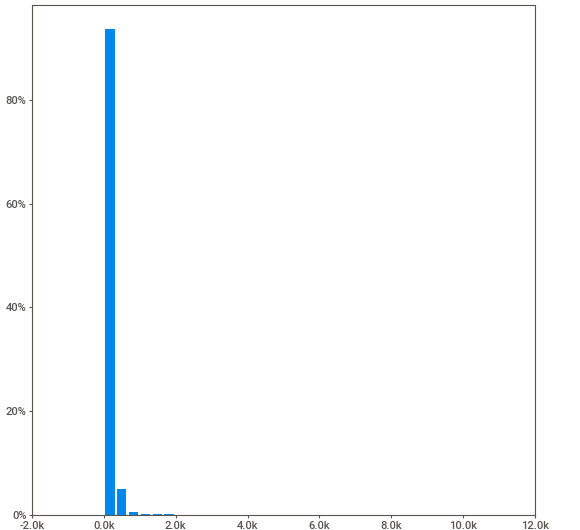
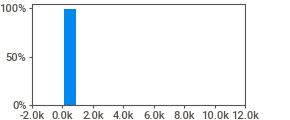
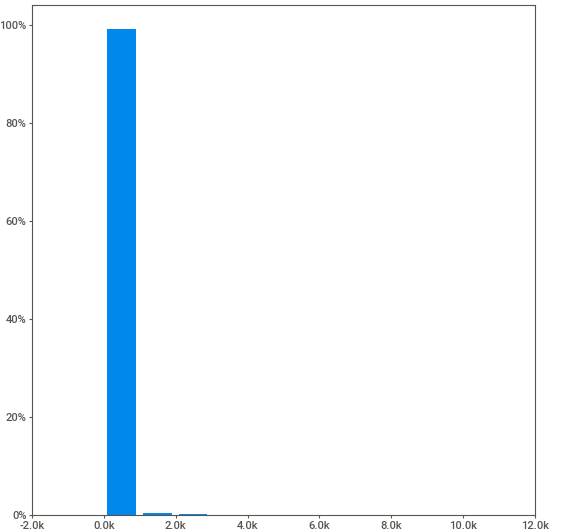
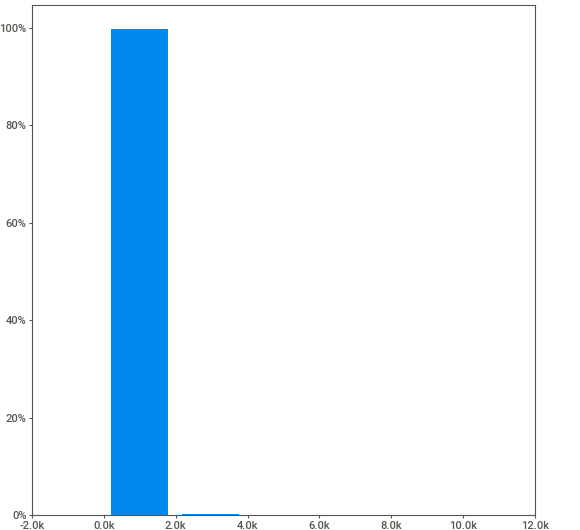
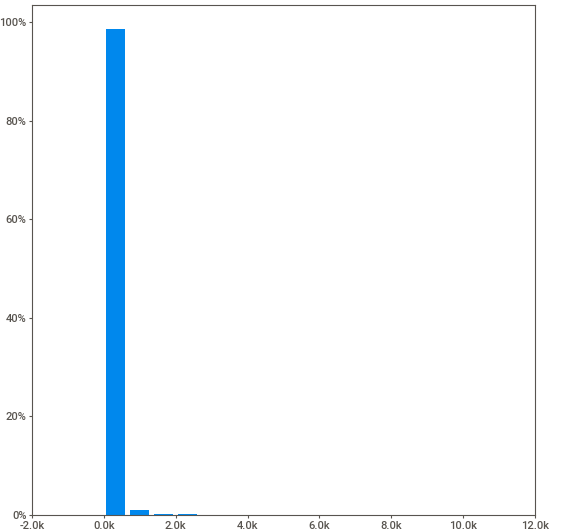
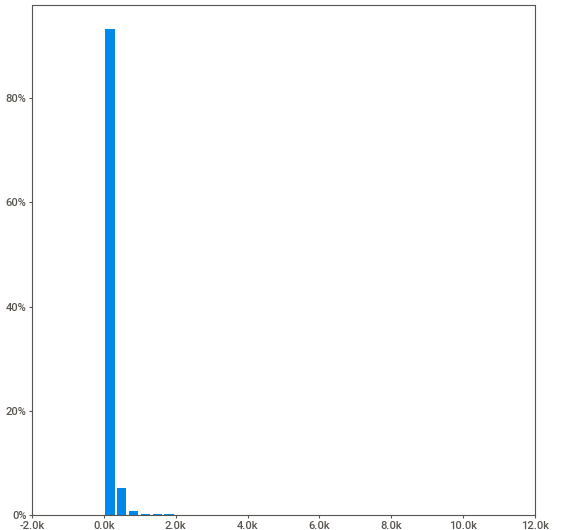
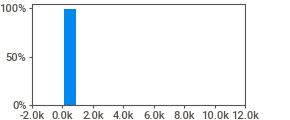
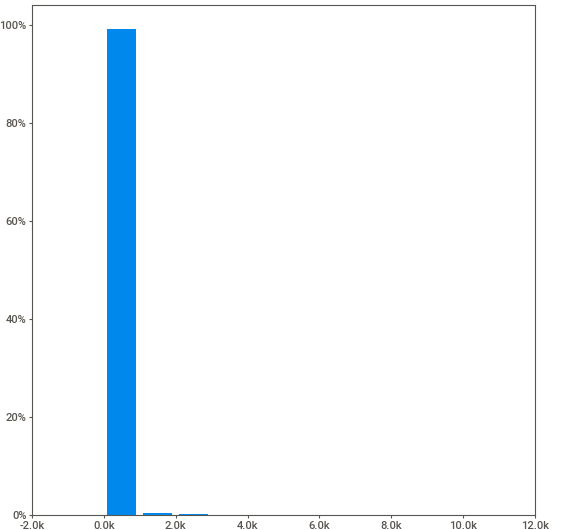
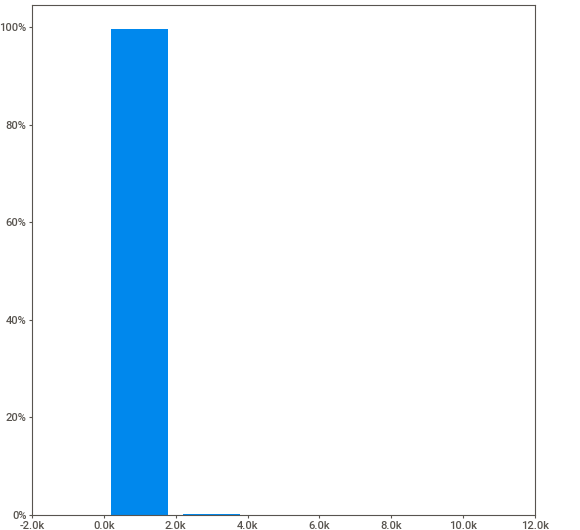
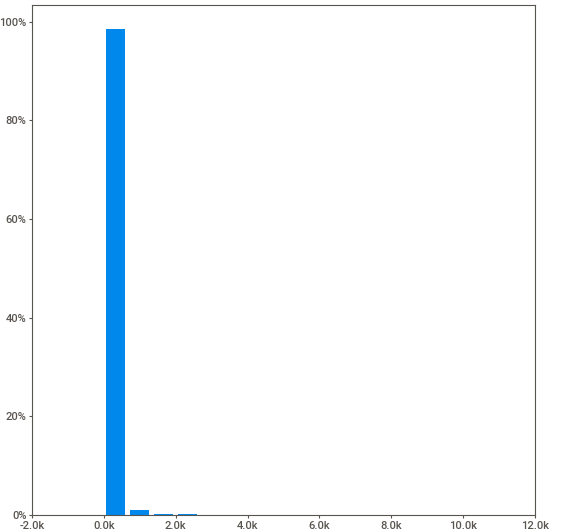
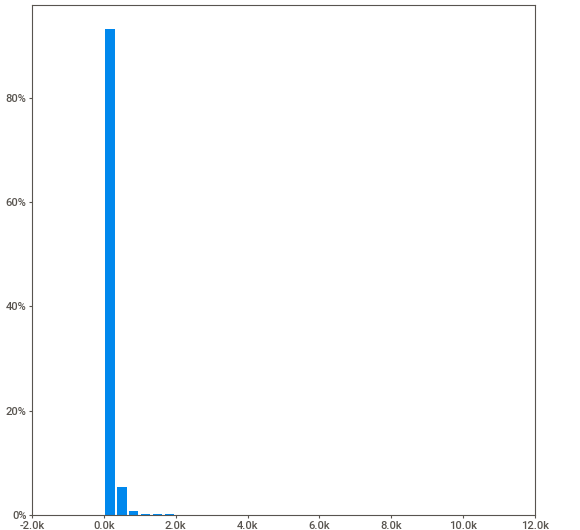
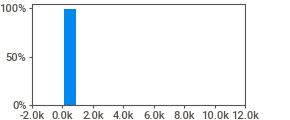
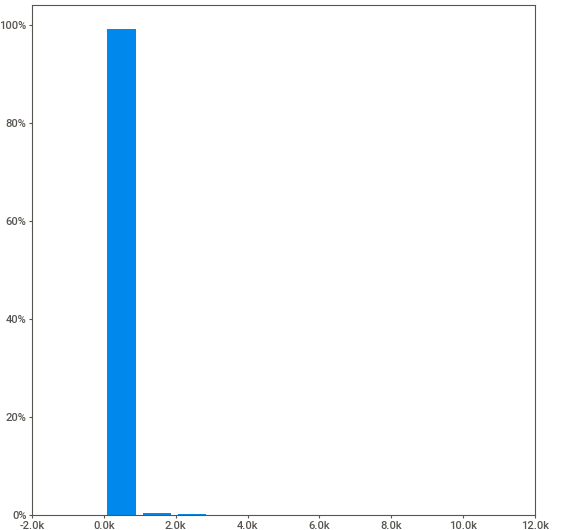
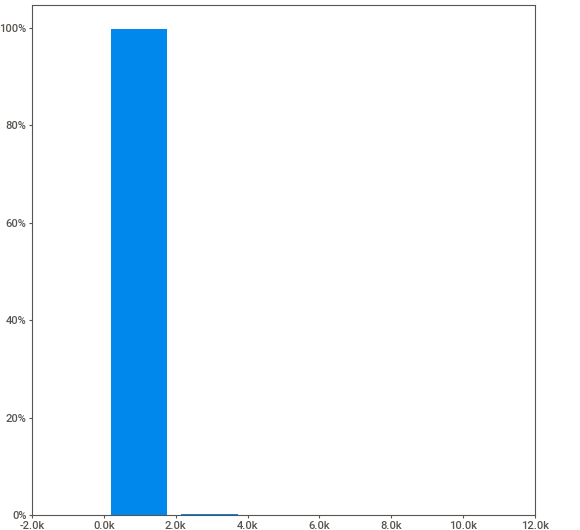
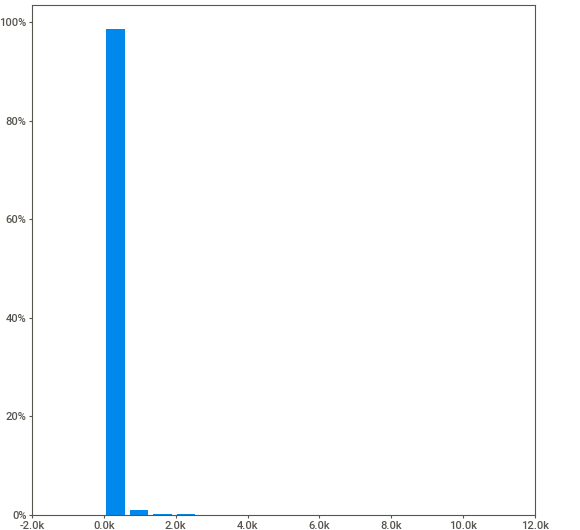
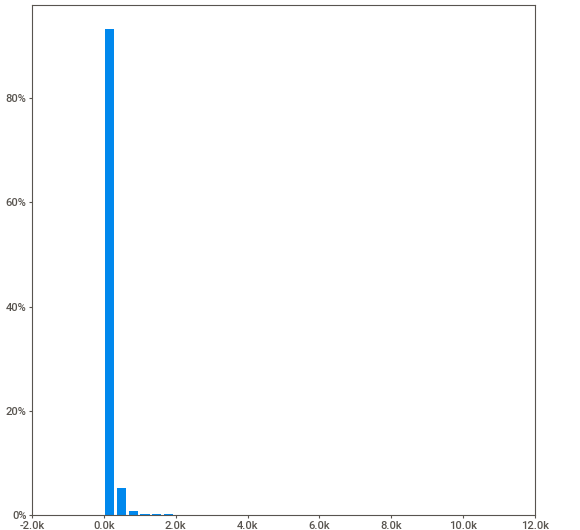
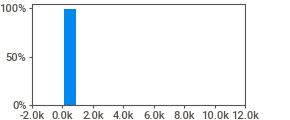
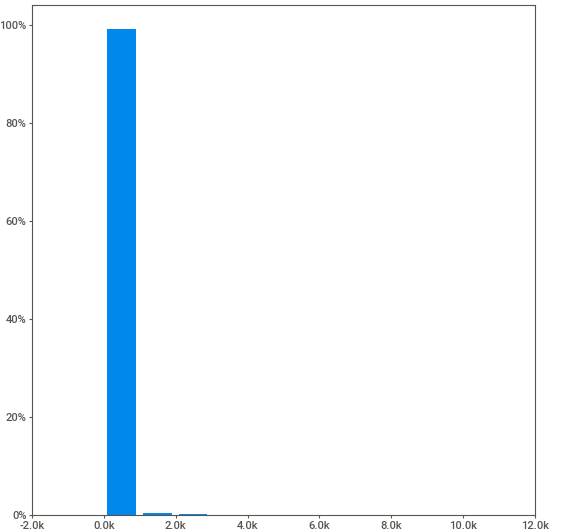
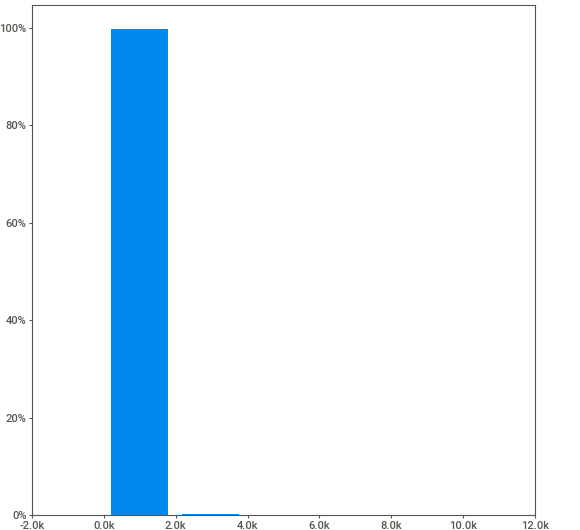
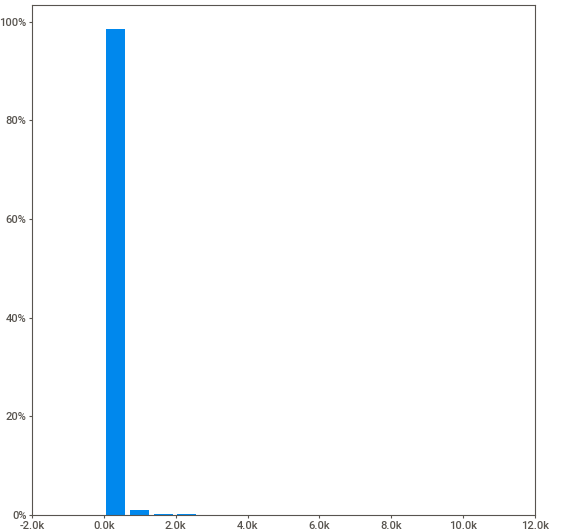
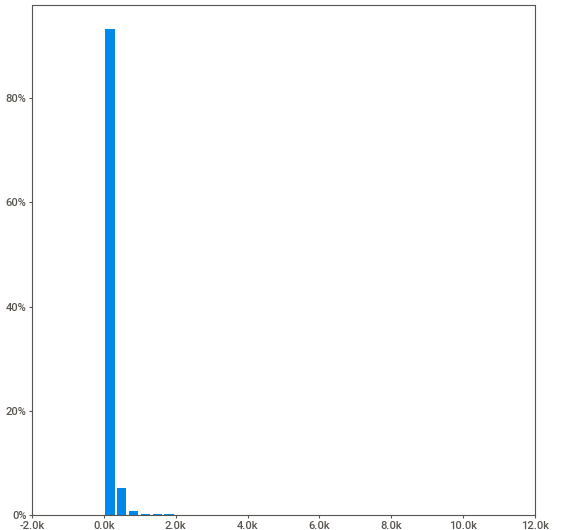
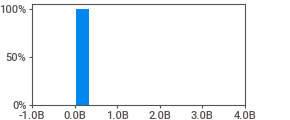
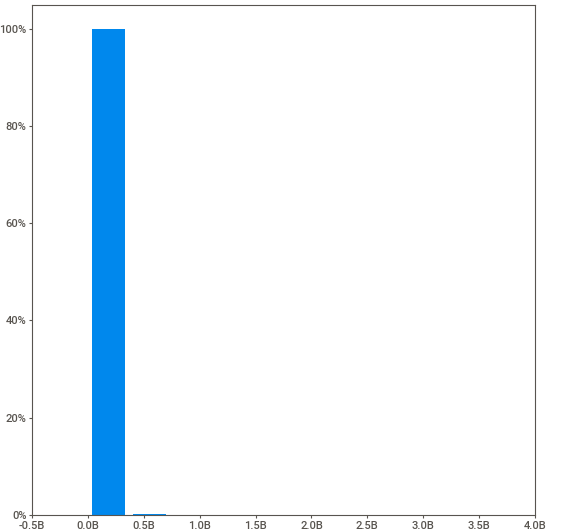
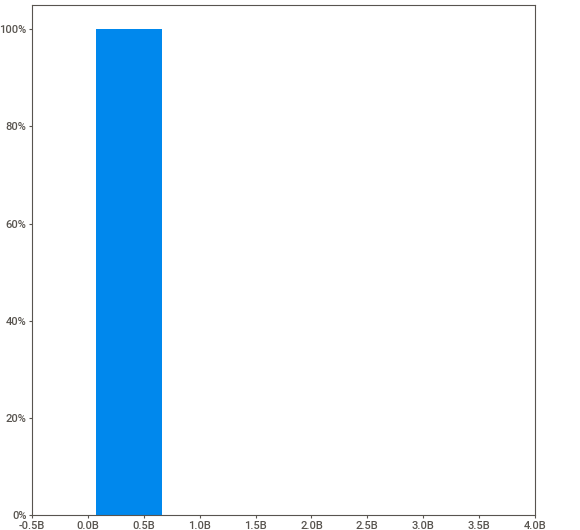
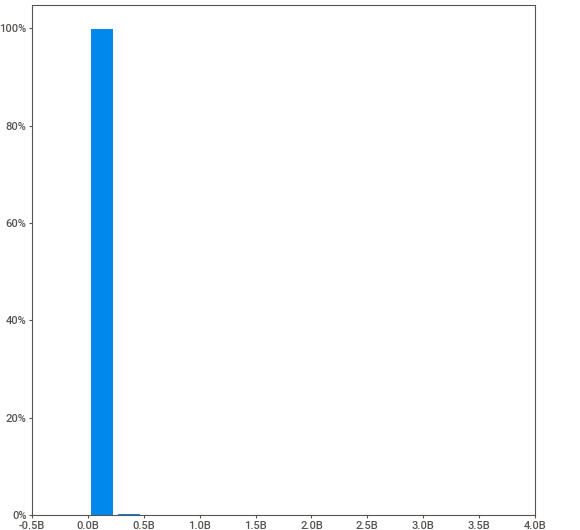
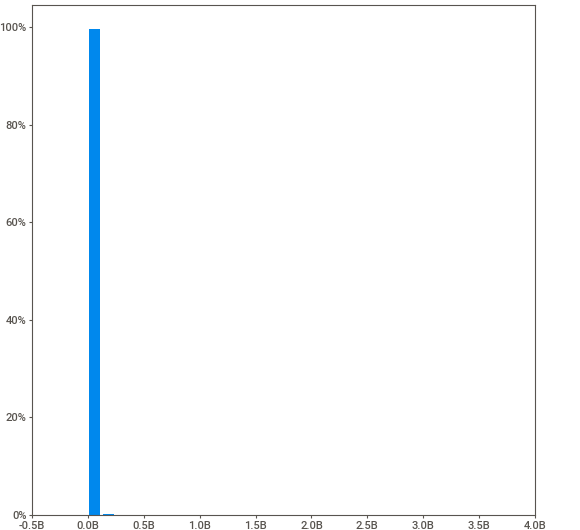
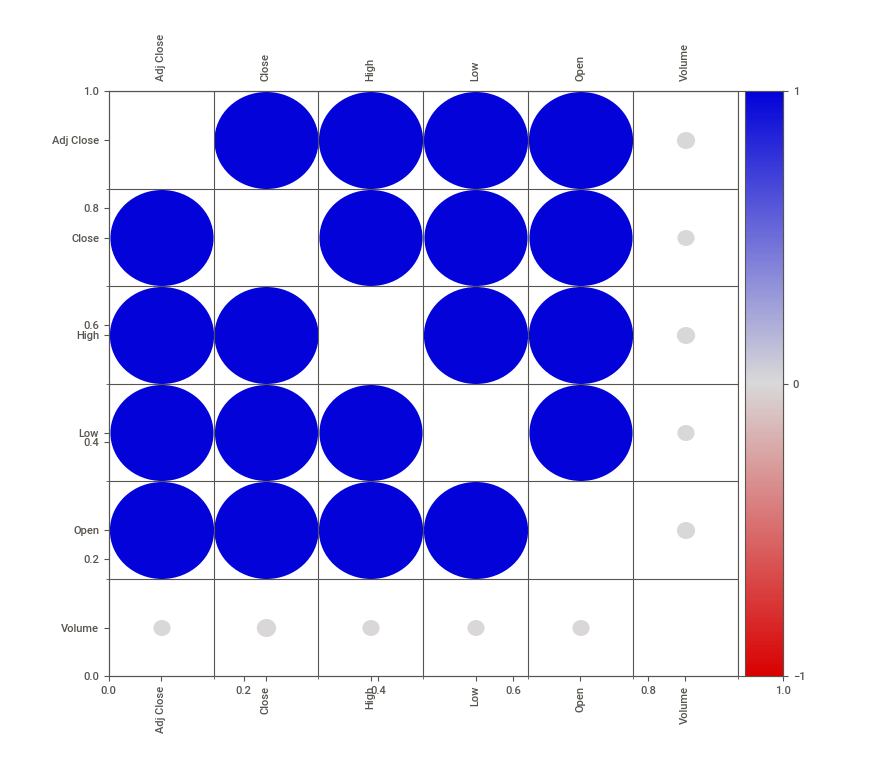
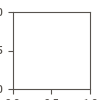

In [8]:
# Lib for EDA visual

if not hasattr(np, "VisibleDeprecationWarning"):
    np.VisibleDeprecationWarning = DeprecationWarning

report = sv.analyze(sp500_historic_df)
report.show_notebook("sweetviz_eda.html")

In [10]:
tickers = sp500_historic_df["Ticker"]
unique_tickers = set(tickers.values)
print(len(unique_tickers), unique_tickers)
print(tickers.isna().any())
print(tickers.dtype)

503 {'KMX', 'SMCI', 'TTD', 'APA', 'APO', 'C', 'DD', 'FAST', 'AEE', 'ROL', 'META', 'VLTO', 'AON', 'MO', 'PWR', 'JKHY', 'AVGO', 'PAYC', 'CSX', 'GWW', 'HPQ', 'JBL', 'ABT', 'PHM', 'AIZ', 'TKO', 'TMUS', 'BR', 'CINF', 'FE', 'GRMN', 'EQIX', 'ICE', 'SWK', 'RCL', 'TSCO', 'LLY', 'NVR', 'LNT', 'STE', 'NXPI', 'NTRS', 'F', 'BX', 'AMZN', 'CL', 'BIIB', 'UNP', 'ITW', 'HWM', 'LMT', 'SPG', 'VICI', 'PNC', 'NWS', 'GEN', 'CARR', 'LHX', 'DECK', 'COST', 'ACGL', 'PPL', 'REG', 'EXPE', 'BAX', 'PSX', 'J', 'KO', 'FICO', 'CNP', 'POOL', 'V', 'APH', 'IBM', 'AAPL', 'SW', 'ABBV', 'TECH', 'CCL', 'KEYS', 'TSN', 'BA', 'WTW', 'COO', 'ECL', 'IVZ', 'MCK', 'ADM', 'LIN', 'CF', 'VST', 'GM', 'FI', 'VRSN', 'DASH', 'DOW', 'APP', 'FFIV', 'INVH', 'GEHC', 'WSM', 'USB', 'MS', 'CMS', 'ELV', 'EXC', 'CSCO', 'KIM', 'INTU', 'NEE', 'BLDR', 'CRWD', 'CRM', 'DHR', 'VRSK', 'KR', 'PLTR', 'TSLA', 'GE', 'DOC', 'UNH', 'DLR', 'ZBH', 'VTRS', 'NCLH', 'ED', 'WEC', 'INTC', 'TT', 'LULU', 'SWKS', 'PLD', 'MU', 'WELL', 'RMD', 'TROW', 'GS', 'UBER', 'HOOD', 

In [11]:
dates = sp500_historic_df["Date"]
print(dates.isna().any())
print(dates.dtype)


False
object


In [12]:
adj_close = sp500_historic_df["Adj Close"]
print(adj_close.isna().any())
print(adj_close.dtype)

False
float64


Data Cleaning

In [13]:
# Utilizing counts for tickers

ticker_counts = sp500_historic_df['Ticker'].value_counts()
print(ticker_counts)
valid_tickers_t = ticker_counts[ticker_counts > 1826]
print(valid_tickers_t)

ticker_counts_map = {}
for index, row in sp500_historic_df.iterrows():
    ticker = row["Ticker"]
    if ticker in ticker_counts_map:
        ticker_counts_map[ticker] += 1
    else:
        ticker_counts_map[ticker] = 1

Ticker
A       2514
NI      2514
NWSA    2514
NWS     2514
NVR     2514
        ... 
GEHC     718
KVUE     623
VLTO     518
SOLV     399
GEV      398
Name: count, Length: 503, dtype: int64
Ticker
A       2514
NI      2514
NWSA    2514
NWS     2514
NVR     2514
        ... 
LW      2252
INVH    2197
IR      2127
VICI    1966
DAY     1887
Name: count, Length: 480, dtype: int64


In [14]:
# Create a set of valid tickers with 5 years or more data
valid_tickers = set()

for ticker, count in ticker_counts_map.items():
    if count > 1826:
        valid_tickers.add(ticker)

In [15]:
print((len(valid_tickers)), valid_tickers)


480 {'KMX', 'SMCI', 'TTD', 'APA', 'APO', 'C', 'DD', 'FAST', 'AEE', 'ROL', 'META', 'AON', 'MO', 'PWR', 'JKHY', 'AVGO', 'PAYC', 'CSX', 'GWW', 'HPQ', 'JBL', 'ABT', 'PHM', 'AIZ', 'TKO', 'TMUS', 'BR', 'CINF', 'FE', 'GRMN', 'EQIX', 'ICE', 'SWK', 'RCL', 'TSCO', 'LLY', 'NVR', 'LNT', 'STE', 'NXPI', 'NTRS', 'F', 'BX', 'AMZN', 'CL', 'BIIB', 'UNP', 'ITW', 'HWM', 'LMT', 'SPG', 'VICI', 'PNC', 'NWS', 'GEN', 'LHX', 'DECK', 'COST', 'ACGL', 'PPL', 'REG', 'EXPE', 'BAX', 'PSX', 'J', 'KO', 'FICO', 'CNP', 'POOL', 'V', 'APH', 'IBM', 'AAPL', 'SW', 'ABBV', 'TECH', 'CCL', 'KEYS', 'TSN', 'BA', 'WTW', 'COO', 'ECL', 'IVZ', 'MCK', 'ADM', 'LIN', 'CF', 'VST', 'GM', 'FI', 'VRSN', 'FFIV', 'INVH', 'WSM', 'USB', 'MS', 'CMS', 'ELV', 'EXC', 'CSCO', 'KIM', 'INTU', 'NEE', 'BLDR', 'CRM', 'DHR', 'VRSK', 'KR', 'TSLA', 'GE', 'DOC', 'UNH', 'DLR', 'ZBH', 'VTRS', 'NCLH', 'ED', 'WEC', 'INTC', 'TT', 'LULU', 'SWKS', 'PLD', 'MU', 'WELL', 'RMD', 'TROW', 'GS', 'LOW', 'ORLY', 'IPG', 'CHTR', 'AWK', 'PKG', 'AXON', 'HII', 'KKR', 'HBAN', 'EW'

In [16]:
sp500_historic_df = sp500_historic_df[sp500_historic_df['Ticker'].isin(valid_tickers)]


In [17]:
display(sp500_historic_df)


,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2015-10-28,A,34.609634,37.520000,37.610001,36.770000,37.060001,1780100.0
1,2015-10-28,AAPL,26.803020,29.817499,29.825001,29.014999,29.232500,342205600.0
2,2015-10-28,ABBV,35.140800,53.259998,53.840000,52.080002,52.820000,7869000.0
3,2015-10-28,ABT,37.075253,44.759998,44.770000,43.639999,43.959999,6158300.0
4,2015-10-28,ACGL,24.612423,25.883333,25.969999,25.666668,25.920000,1280100.0
...,...,...,...,...,...,...,...,...
1231258,2025-10-27,XYZ,80.150002,80.150002,81.489998,79.900002,80.580002,5144100.0
1231259,2025-10-27,YUM,142.979996,142.979996,144.380005,142.029999,143.610001,1743600.0
1231260,2025-10-27,ZBH,103.120003,103.120003,103.510002,102.529999,103.150002,993500.0
1231261,2025-10-27,ZBRA,310.570007,310.570007,314.579987,309.299988,311.929993,971700.0


In [18]:
# Forward fill NA values

sp500_historic_df = sp500_historic_df.groupby('Ticker').apply(lambda g: g.fillna(method='ffill')).reset_index(drop=True)
sp500_historic_df = sp500_historic_df.dropna(subset=["Adj Close"])

/var/folders/zw/1p1g2scn1llcnl481zdq41wm0000gn/T/ipykernel_12337/3324818769.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp500_historic_df = sp500_historic_df.groupby('Ticker').apply(lambda g: g.fillna(method='ffill')).reset_index(drop=True)
/var/folders/zw/1p1g2scn1llcnl481zdq41wm0000gn/T/ipykernel_12337/3324818769.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sp500_historic_df = sp500_historic_df.groupby('Ticker').apply(lambda g: g.fillna(method='ffill')).reset_index(drop=True)


In [19]:
display(sp500_historic_df)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2015-10-28,A,34.609634,37.520000,37.610001,36.770000,37.060001,1780100.0
1,2015-10-29,A,34.775665,37.700001,37.770000,37.279999,37.470001,1352300.0
2,2015-10-30,A,34.830997,37.759998,38.099998,37.680000,37.720001,2194600.0
3,2015-11-02,A,35.596638,38.590000,38.619999,37.799999,37.869999,1810800.0
4,2015-11-03,A,35.301445,38.270000,38.520000,38.160000,38.310001,1485800.0
...,...,...,...,...,...,...,...,...
1203468,2025-10-21,ZTS,146.089996,146.089996,147.270004,144.550003,144.830002,2073400.0
1203469,2025-10-22,ZTS,147.110001,147.110001,148.300003,145.729996,146.399994,2875400.0
1203470,2025-10-23,ZTS,146.389999,146.389999,147.509995,145.179993,146.000000,1566300.0
1203471,2025-10-24,ZTS,145.940002,145.940002,147.490005,145.910004,147.119995,1375100.0


In [24]:
sp500_historic_df.to_csv("../data/sp500_historical_clean.csv", index=False)


Exploratory Data Analysis

In [26]:
sp500_historic_df = pd.read_csv("../data/sp500_historical_clean.csv")


In [27]:
display(sp500_historic_df)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2015-10-28,A,34.609634,37.520000,37.610001,36.770000,37.060001,1780100.0
1,2015-10-29,A,34.775665,37.700001,37.770000,37.279999,37.470001,1352300.0
2,2015-10-30,A,34.830997,37.759998,38.099998,37.680000,37.720001,2194600.0
3,2015-11-02,A,35.596638,38.590000,38.619999,37.799999,37.869999,1810800.0
4,2015-11-03,A,35.301445,38.270000,38.520000,38.160000,38.310001,1485800.0
...,...,...,...,...,...,...,...,...
1203468,2025-10-21,ZTS,146.089996,146.089996,147.270004,144.550003,144.830002,2073400.0
1203469,2025-10-22,ZTS,147.110001,147.110001,148.300003,145.729996,146.399994,2875400.0
1203470,2025-10-23,ZTS,146.389999,146.389999,147.509995,145.179993,146.000000,1566300.0
1203471,2025-10-24,ZTS,145.940002,145.940002,147.490005,145.910004,147.119995,1375100.0


In [28]:
apple_data = sp500_historic_df[sp500_historic_df["Ticker"] == "AAPL"]
display(apple_data)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
2514,2015-10-28,AAPL,26.803020,29.817499,29.825001,29.014999,29.232500,342205600.0
2515,2015-10-29,AAPL,27.086174,30.132500,30.172501,29.567499,29.674999,204909200.0
2516,2015-10-30,AAPL,26.854702,29.875000,30.305000,29.862499,30.247499,197461200.0
2517,2015-11-02,AAPL,27.232244,30.295000,30.340000,29.902500,30.200001,128813200.0
2518,2015-11-03,AAPL,27.544609,30.642500,30.872499,30.174999,30.197500,182076000.0
...,...,...,...,...,...,...,...,...
5023,2025-10-21,AAPL,262.769989,262.769989,265.290009,261.829987,261.880005,46695900.0
5024,2025-10-22,AAPL,258.450012,258.450012,262.850006,255.429993,262.649994,45015300.0
5025,2025-10-23,AAPL,259.579987,259.579987,260.619995,258.010010,259.940002,32754900.0
5026,2025-10-24,AAPL,262.820007,262.820007,264.130005,259.179993,261.190002,38253700.0


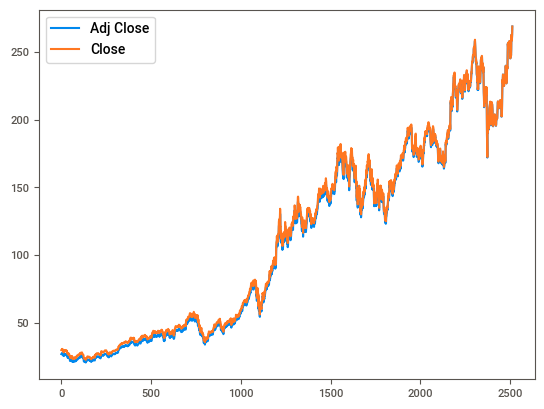

In [30]:
# Plot APPLE data
x = np.arange(0, apple_data.shape[0])
plt.plot(x, apple_data["Adj Close"], label="Adj Close")
plt.plot(x, apple_data["Close"], label="Close")
# plt.plot(x, apple_data["Volume"])
plt.legend()
plt.show()

In [31]:
# Plot data for APPLE, NVIDIA, MSFT, META, GOOGL, AMZN
major_stocks = ["AAPL", "NVDA", "MSFT", "META", "GOOGL", "AMZN"]
df_major = sp500_historic_df[sp500_historic_df["Ticker"].isin(major_stocks)].copy()

# Days since start
start_date = pd.Timestamp("2015-07-27")
df_major['Date'] = pd.to_datetime(df_major['Date'])
df_major['Days_Since_Start'] = (df_major['Date'] - start_date).dt.days

df_major['AdjClose_0'] = df_major.groupby('Ticker')['Adj Close'].transform('first')
df_major['AdjClose_Percent'] = ((df_major['Adj Close'] - df_major['AdjClose_0']) / df_major["AdjClose_0"]) * 100

In [32]:
display(df_major)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Days_Since_Start,AdjClose_0,AdjClose_Percent
2514,2015-10-28,AAPL,26.803020,29.817499,29.825001,29.014999,29.232500,342205600.0,93,26.803020,0.000000
2515,2015-10-29,AAPL,27.086174,30.132500,30.172501,29.567499,29.674999,204909200.0,94,26.803020,1.056424
2516,2015-10-30,AAPL,26.854702,29.875000,30.305000,29.862499,30.247499,197461200.0,95,26.803020,0.192820
2517,2015-11-02,AAPL,27.232244,30.295000,30.340000,29.902500,30.200001,128813200.0,98,26.803020,1.601402
2518,2015-11-03,AAPL,27.544609,30.642500,30.872499,30.174999,30.197500,182076000.0,99,26.803020,2.766810
...,...,...,...,...,...,...,...,...,...,...,...
817338,2025-10-21,NVDA,181.160004,181.160004,182.789993,179.800003,182.789993,124240200.0,3739,0.696729,25901.515010
817339,2025-10-22,NVDA,180.279999,180.279999,183.440002,176.759995,181.139999,162249600.0,3740,0.696729,25775.209756
817340,2025-10-23,NVDA,182.160004,182.160004,183.029999,179.789993,180.419998,111363700.0,3741,0.696729,26045.042910
817341,2025-10-24,NVDA,186.259995,186.259995,187.470001,183.500000,183.839996,131296700.0,3742,0.696729,26633.505989


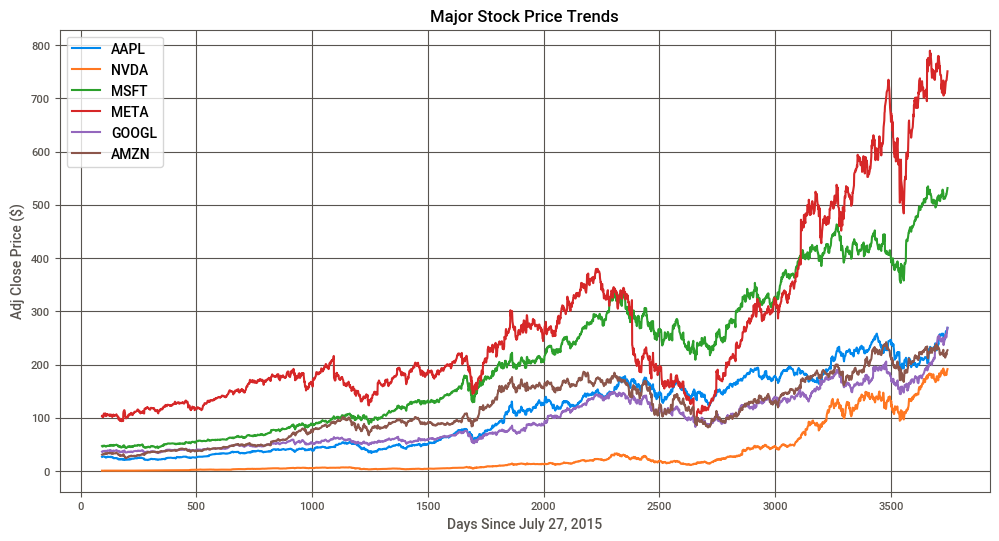

In [33]:
plt.figure(figsize=(12,6))
for ticker in major_stocks:
    subset = df_major[df_major['Ticker']==ticker]
    plt.plot(subset['Days_Since_Start'], subset['Adj Close'], label=ticker)
plt.title("Major Stock Price Trends")
plt.xlabel("Days Since July 27, 2015")
plt.ylabel("Adj Close Price ($)")
plt.legend()
plt.grid()
plt.show()

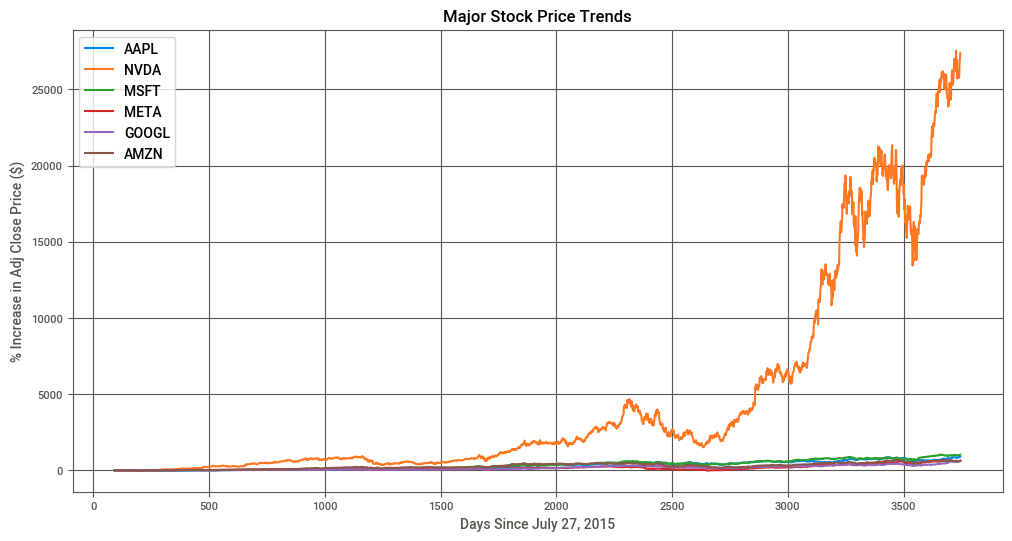

In [35]:
# With NVIDIA
plt.figure(figsize=(12,6))
for ticker in major_stocks:
    subset = df_major[df_major['Ticker']==ticker]
    plt.plot(subset['Days_Since_Start'], subset['AdjClose_Percent'], label=ticker)
plt.title("Major Stock Price Trends")
plt.xlabel("Days Since July 27, 2015")
plt.ylabel("% Increase in Adj Close Price ($)")
plt.legend()
plt.grid()
plt.show()

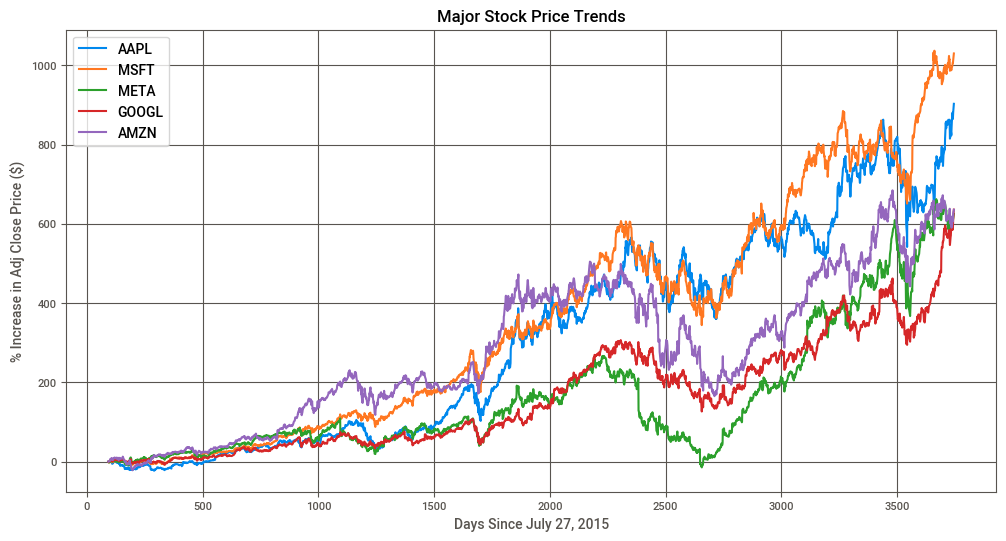

In [36]:
# Cleaner, Without NVIDIA -- too much increase
plt.figure(figsize=(12,6))
for ticker in major_stocks:
    if ticker != "NVDA":
        subset = df_major[df_major['Ticker']==ticker]
        plt.plot(subset['Days_Since_Start'], subset['AdjClose_Percent'], label=ticker)
plt.title("Major Stock Price Trends")
plt.xlabel("Days Since July 27, 2015")
plt.ylabel("% Increase in Adj Close Price ($)")
plt.legend()
plt.grid()
plt.show()

In [37]:
# Processing for all stocks
start_date = pd.Timestamp("2015-07-27")
sp500_historic_df['Date'] = pd.to_datetime(sp500_historic_df['Date'])
sp500_historic_df['Days_Since_Start'] = (sp500_historic_df['Date'] - start_date).dt.days

sp500_historic_df['AdjClose_0'] = sp500_historic_df.groupby('Ticker')['Adj Close'].transform('first')
sp500_historic_df['AdjClose_Percent'] = ((sp500_historic_df['Adj Close'] - sp500_historic_df['AdjClose_0']) / sp500_historic_df["AdjClose_0"]) * 100


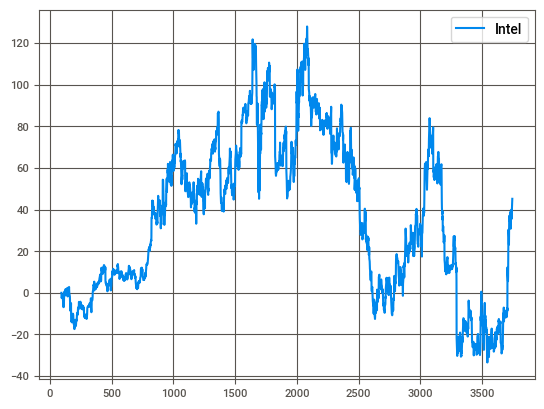

In [38]:
intel_data = sp500_historic_df[sp500_historic_df["Ticker"] == "INTC"]
plt.plot(intel_data["Days_Since_Start"], intel_data["AdjClose_Percent"], label = "Intel")
plt.legend()
plt.grid()
plt.show()